## Time Series - Facebook Prophet

# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
import _pickle as pickle

from fbprophet import Prophet as proph

In [2]:
url = 'https://www.quandl.com/api/v3/datasets/BCHAIN/MKPRU.csv?api_key=Lq43ztbiWJ73CJUDPiye&start_date=2016-01-01&end_date=2020-5-29&order=asc'

## Loading in the Data

In [3]:
df= pd.read_csv(url)
df.head()

,Date,Value
0,2016-01-01,429.34
1,2016-01-02,432.33
2,2016-01-03,433.94
3,2016-01-04,428.13
4,2016-01-05,433.00


## Formatting the data for Facebook Prophet

In [4]:
# Resetting the index back so Dates are no longer indexed
#df.reset_index(inplace=True)

# Renaming the columns for use in FB prophet
df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)

df.head()

,ds,y
0,2016-01-01,429.34
1,2016-01-02,432.33
2,2016-01-03,433.94
3,2016-01-04,428.13
4,2016-01-05,433.00


## Plotting the data

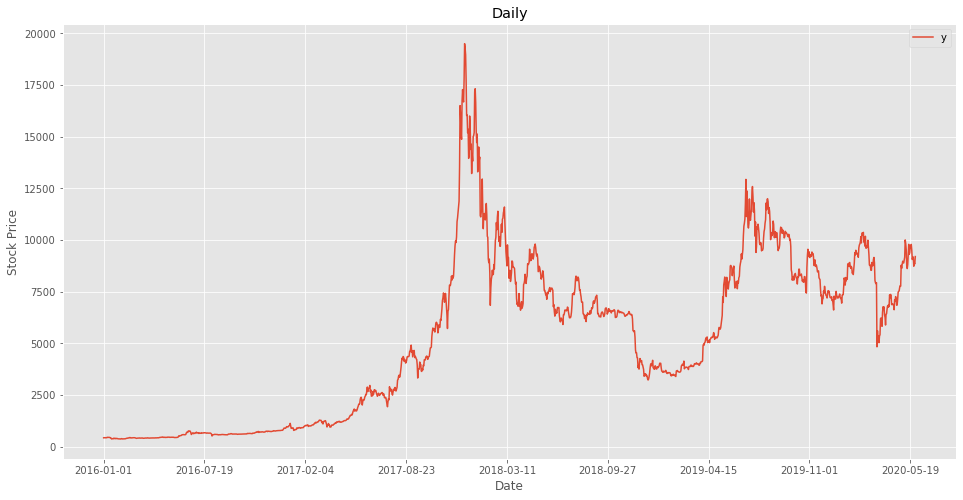

In [5]:
# Plotting the price 
pd.plotting.register_matplotlib_converters()

ax = df.set_index('ds').plot(figsize=(16,8))
ax.set_title("Daily")
ax.set_ylabel('Stock Price')
ax.set_xlabel('Date')

plt.show()

## Modeling

In [6]:
# Fitting and training
mod = proph(interval_width=0.95, daily_seasonality=True)
mod.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


## Creating Future dates to Forescast

In [7]:
# Setting up predictions to be made
future = mod.make_future_dataframe(periods=90, freq='D')
future.tail()

,ds
1696,2020-08-23
1697,2020-08-24
1698,2020-08-25
1699,2020-08-26
1700,2020-08-27


## Forecasting Future Values

In [8]:
forecast = mod.predict(future)

# Saving the last prediction for later
day90pred = forecast[['yhat']].iloc[[-1]]

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1696,2020-08-23,7547.778253,5748.471606,11166.145051,5410.725257,9722.438560,981.762623,981.762623,981.762623,219.044272,...,20.412370,20.412370,20.412370,742.305981,742.305981,742.305981,0.0,0.0,0.0,8529.540876
1697,2020-08-24,7543.996849,5517.788264,11051.277841,5351.312277,9744.495900,961.735808,961.735808,961.735808,219.044272,...,4.026573,4.026573,4.026573,738.664963,738.664963,738.664963,0.0,0.0,0.0,8505.732657
1698,2020-08-25,7540.215445,5632.692170,11428.543873,5300.659010,9766.553240,946.430309,946.430309,946.430309,219.044272,...,-6.568783,-6.568783,-6.568783,733.954821,733.954821,733.954821,0.0,0.0,0.0,8486.645754
1699,2020-08-26,7536.434041,5585.884202,11229.848897,5259.075807,9793.071168,953.636049,953.636049,953.636049,219.044272,...,6.421182,6.421182,6.421182,728.170596,728.170596,728.170596,0.0,0.0,0.0,8490.070090
1700,2020-08-27,7532.652636,5520.578828,11307.798576,5208.930708,9824.191383,931.130891,931.130891,931.130891,219.044272,...,-9.228883,-9.228883,-9.228883,721.315503,721.315503,721.315503,0.0,0.0,0.0,8463.783527


## Plotting Values
# Blue line = forecasted values
# Black dots = observed values
# Uncertainty intervals = blue shaded region

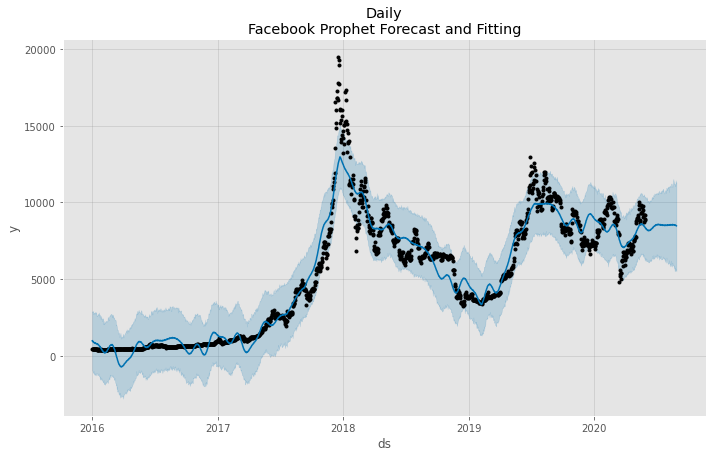

In [9]:
mod.plot(forecast, uncertainty=True)
plt.title('Daily\nFacebook Prophet Forecast and Fitting')
plt.show()

In [10]:
## Graph Above Zoomed in

ConversionError: Failed to convert value(s) to axis units: ['2019', '2020']

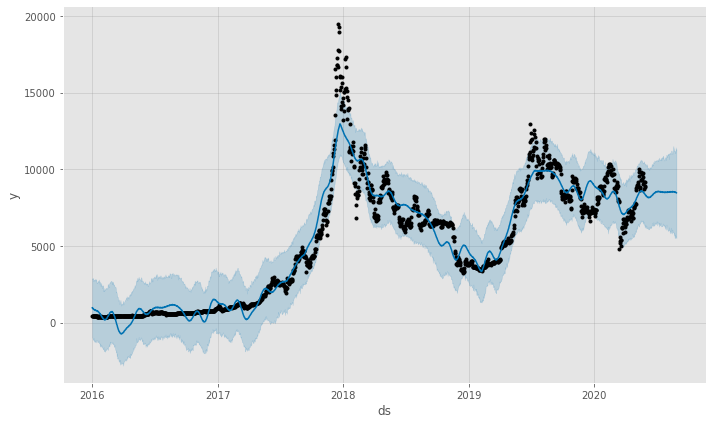

In [11]:
mod.plot(forecast, uncertainty=True)

plt.xticks(['2019','2020'])
plt.show()

## Plotted Componenets of the forecast

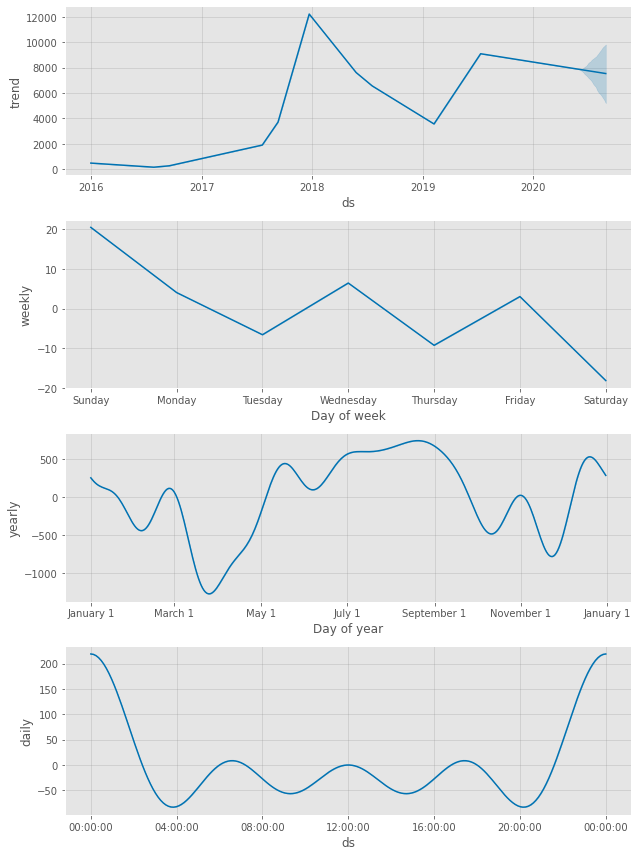

In [12]:
mod.plot_components(forecast)
plt.show()

## FBProphet for Monthly Data

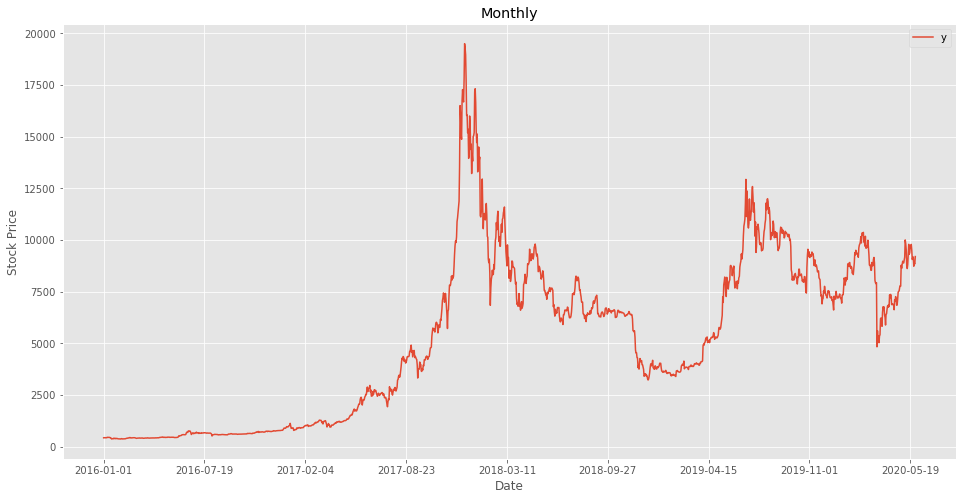

In [13]:
# Plotting the price 
pd.plotting.register_matplotlib_converters()

ax = df.set_index('ds').plot(figsize=(16,8))
ax.set_title("Monthly")
ax.set_ylabel('Stock Price')
ax.set_xlabel('Date')

plt.show()

In [14]:
# Fitting and training
mod = proph(interval_width=0.95)
mod.fit(df)

# Setting up predictions to be made
future = mod.make_future_dataframe(periods=3, freq='M')

# Making predictions
forecast = mod.predict(future)

# Saving the last prediction for later
month3pred = forecast[['yhat']].iloc[[-1]]
forecast.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1609,2020-05-28,8083.270107,6389.932279,10259.992343,8083.270107,8083.270107,219.818145,219.818145,219.818145,-9.053929,-9.053929,-9.053929,228.872074,228.872074,228.872074,0.0,0.0,0.0,8303.088253
1610,2020-05-29,8079.430236,6432.234141,10388.890864,8079.430236,8079.430236,204.466637,204.466637,204.466637,2.960744,2.960744,2.960744,201.505892,201.505892,201.505892,0.0,0.0,0.0,8283.896873
1611,2020-05-31,8071.750494,6288.003662,10248.479044,8071.750494,8071.750494,171.251935,171.251935,171.251935,20.315555,20.315555,20.315555,150.936380,150.936380,150.936380,0.0,0.0,0.0,8243.002429
1612,2020-06-30,7956.554359,6385.667406,10544.852124,7498.522577,8463.466257,524.904088,524.904088,524.904088,-6.521825,-6.521825,-6.521825,531.425913,531.425913,531.425913,0.0,0.0,0.0,8481.458447
1613,2020-07-31,7837.518353,6021.514194,10734.063204,6562.173543,9183.307678,629.070911,629.070911,629.070911,2.960744,2.960744,2.960744,626.110167,626.110167,626.110167,0.0,0.0,0.0,8466.589265


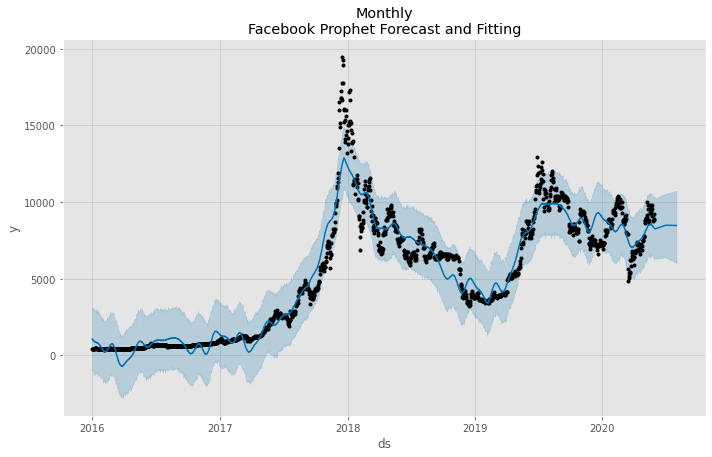

In [15]:
# Plotting the fit and forecast
mod.plot(forecast, uncertainty=True)
plt.title('Monthly\nFacebook Prophet Forecast and Fitting')
plt.show()

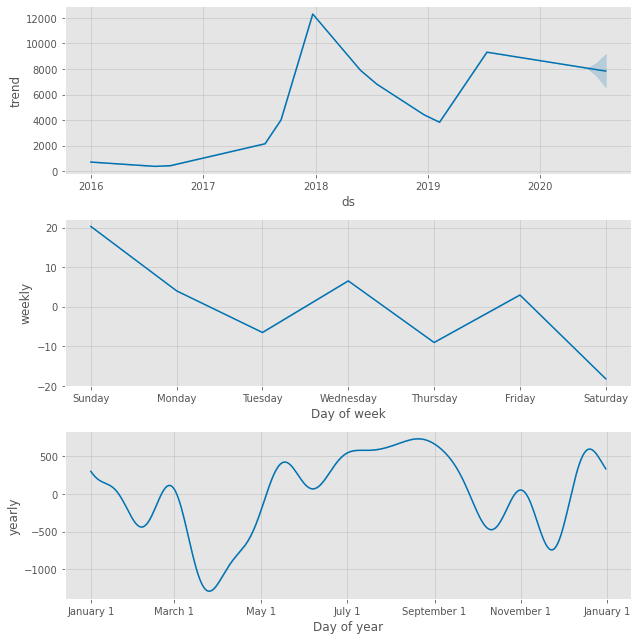

In [16]:
# Plotting the components
mod.plot_components(forecast)
plt.show()

## FBProphet for Weekly Data

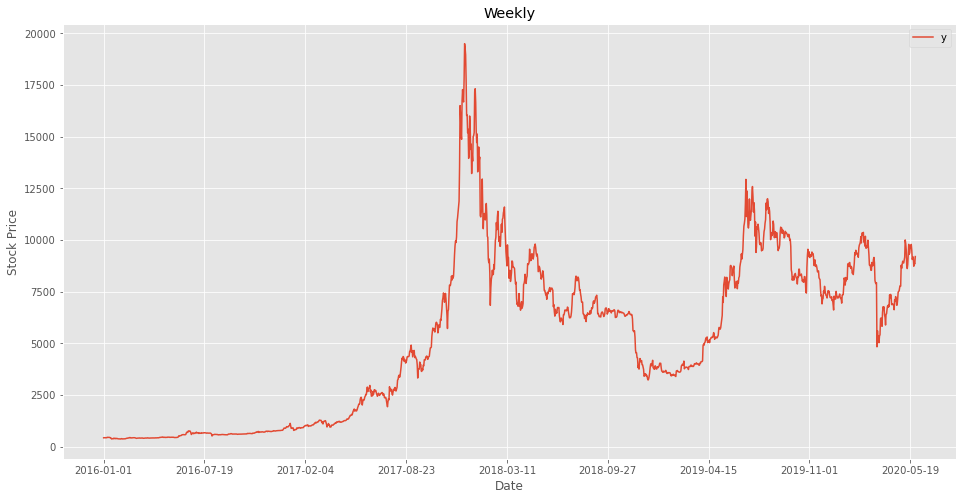

In [17]:
# Plotting the price 
pd.plotting.register_matplotlib_converters()

ax = df.set_index('ds').plot(figsize=(16,8))
ax.set_title("Weekly")
ax.set_ylabel('Stock Price')
ax.set_xlabel('Date')

plt.show()

In [18]:
# Fitting and training
mod = proph(interval_width=0.95, weekly_seasonality=True)
mod.fit(df)

# Setting up predictions to be made
future = mod.make_future_dataframe(periods=12, freq='W')

# Making predictions
forecast = mod.predict(future)

# Saving the last prediction for later
week12pred = forecast[['yhat']].iloc[[-1]]

forecast.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1618,2020-07-19,7883.596807,6292.431925,10830.605433,6919.596103,9023.458996,600.035995,600.035995,600.035995,20.315555,20.315555,20.315555,579.720441,579.720441,579.720441,0.0,0.0,0.0,8483.632803
1619,2020-07-26,7856.717709,6179.834059,10814.567963,6624.106707,9206.823664,620.724991,620.724991,620.724991,20.315555,20.315555,20.315555,600.409437,600.409437,600.409437,0.0,0.0,0.0,8477.442701
1620,2020-08-02,7829.838611,6038.869719,11035.185186,6340.135786,9365.502197,658.555759,658.555759,658.555759,20.315555,20.315555,20.315555,638.240204,638.240204,638.240204,0.0,0.0,0.0,8488.394370
1621,2020-08-09,7802.959513,5984.143973,11071.468226,6118.527235,9638.352691,704.624242,704.624242,704.624242,20.315555,20.315555,20.315555,684.308687,684.308687,684.308687,0.0,0.0,0.0,8507.583755
1622,2020-08-16,7776.080415,5759.923034,11049.252828,5893.497491,9833.341314,741.990337,741.990337,741.990337,20.315555,20.315555,20.315555,721.674782,721.674782,721.674782,0.0,0.0,0.0,8518.070752


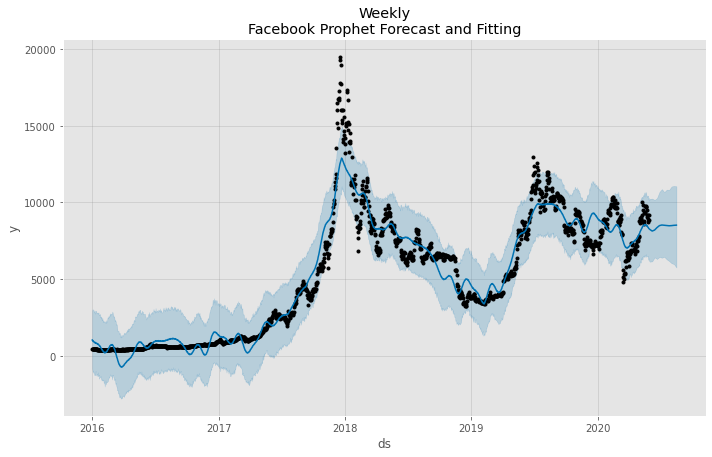

In [19]:
# Plotting the fit and forecast
mod.plot(forecast, uncertainty=True)
plt.title('Weekly\nFacebook Prophet Forecast and Fitting')
plt.show()

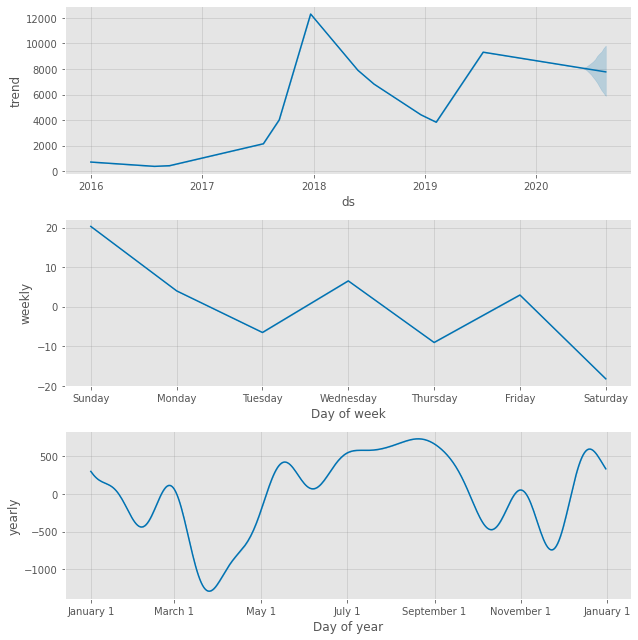

In [20]:
# Plotting the components
mod.plot_components(forecast)
plt.show()

In [21]:
fb_preds = pd.concat([day90pred, week12pred, month3pred], ignore_index=True).rename(columns={'yhat':'predictions'},
                                                                                    index={0:'day', 1:'week', 2:'month'})
print(fb_preds)

       predictions
day    8463.783527
week   8518.070752
month  8466.589265
